<h2 style="color: green;">Image classification using Convolutional Neural Networks</h2>

In this notebook, cifar10 dataset from tensorflow keras datasets is classifed using CNN.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, models, layers


<p style="color: brown">1. Load the dataset</p>


In [41]:
(X_train,y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [42]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [43]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [44]:
y_train = y_train.reshape(-1,)

In [45]:
img_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [46]:
def plot_sample(index):
    plt.figure(figsize=(15,2))
    plt.imshow(X_train[index])
    plt.xlabel(img_classes[y_train[index]])

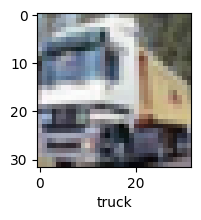

In [47]:
plot_sample(1)

<p style = "color : brown">2. Normalize the data</p>

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

In [48]:
X_train = X_train /255.0
X_test = X_test/255.0

In [49]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

<p style = "color :brown"> 3. Model Traning </p>

<p style = "color: blue"> Train the model using artificial neural networks </p>

In [50]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

ann.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

c:\Users\PC PAL\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [51]:
ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 413s 254ms/step - accuracy: 0.2782 - loss: 2.2005
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 266s 170ms/step - accuracy: 0.3956 - loss: 1.6842
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 266s 170ms/step - accuracy: 0.4320 - loss: 1.5843
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 248s 159ms/step - accuracy: 0.4527 - loss: 1.5294
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 293s 187ms/step - accuracy: 0.4660 - loss: 1.4907


 * after 5 epochs, the neural network gave 46% of accuracy. Let's see what happens with the cnn.

<p style = "color: blue"> Train the model using convolutional neural networks </p>

In [52]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

c:\Users\PC PAL\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 32ms/step - accuracy: 0.3765 - loss: 1.7218
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.5882 - loss: 1.1630
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.6541 - loss: 1.0000
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.6890 - loss: 0.8952
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.7061 - loss: 0.8326
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.7323 - loss: 0.7646
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.7515 - loss: 0.7091
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.7700 - loss: 0.6629
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.7830 - loss: 0.6194
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.7996 - loss: 0.5775


* It got near 80% accuracy on the training data and 70% on the test data.

In [54]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.7025 - loss: 0.9266


[0.9253368973731995, 0.7019000053405762]

In [55]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


array([[3.0529434e-03, 5.7801099e-05, 3.1984539e-04, 8.6217415e-01,
        6.2142128e-05, 7.9376757e-02, 8.2126511e-03, 9.9475619e-07,
        4.6728313e-02, 1.4394859e-05],
       [1.4567093e-04, 5.0768498e-03, 2.0147179e-07, 1.5097529e-09,
        5.8628336e-10, 6.6545325e-10, 5.6695265e-10, 6.8001559e-12,
        9.9476612e-01, 1.1194161e-05],
       [1.6601438e-02, 2.5761193e-01, 1.4129683e-03, 5.6291104e-04,
        2.5315123e-04, 3.0738252e-04, 2.6807442e-04, 3.3955893e-04,
        7.1307439e-01, 9.5682051e-03],
       [9.2034400e-01, 2.7578332e-02, 5.2574323e-03, 5.5167102e-04,
        2.9708812e-04, 6.2095671e-05, 5.6094912e-05, 3.6652560e-05,
        4.5710336e-02, 1.0632140e-04],
       [6.7182533e-08, 5.8039456e-07, 4.5942427e-03, 2.0655360e-02,
        2.5427274e-02, 2.2705235e-04, 9.4909471e-01, 9.0138439e-09,
        6.9010844e-07, 1.4090519e-09]], dtype=float32)

In [58]:
y_test = y_test.reshape(-1,)

In [59]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [60]:
y_pred = [np.argmax(i) for i in y_pred]

In [61]:
y_pred[:5]

[3, 8, 8, 0, 6]